In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [115]:
train_data = pd.read_excel('D:/606/flight/Data_Train.xlsx')
test_data=pd.read_excel("D:/606/flight/Test_set.xlsx")

In [116]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [117]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [118]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

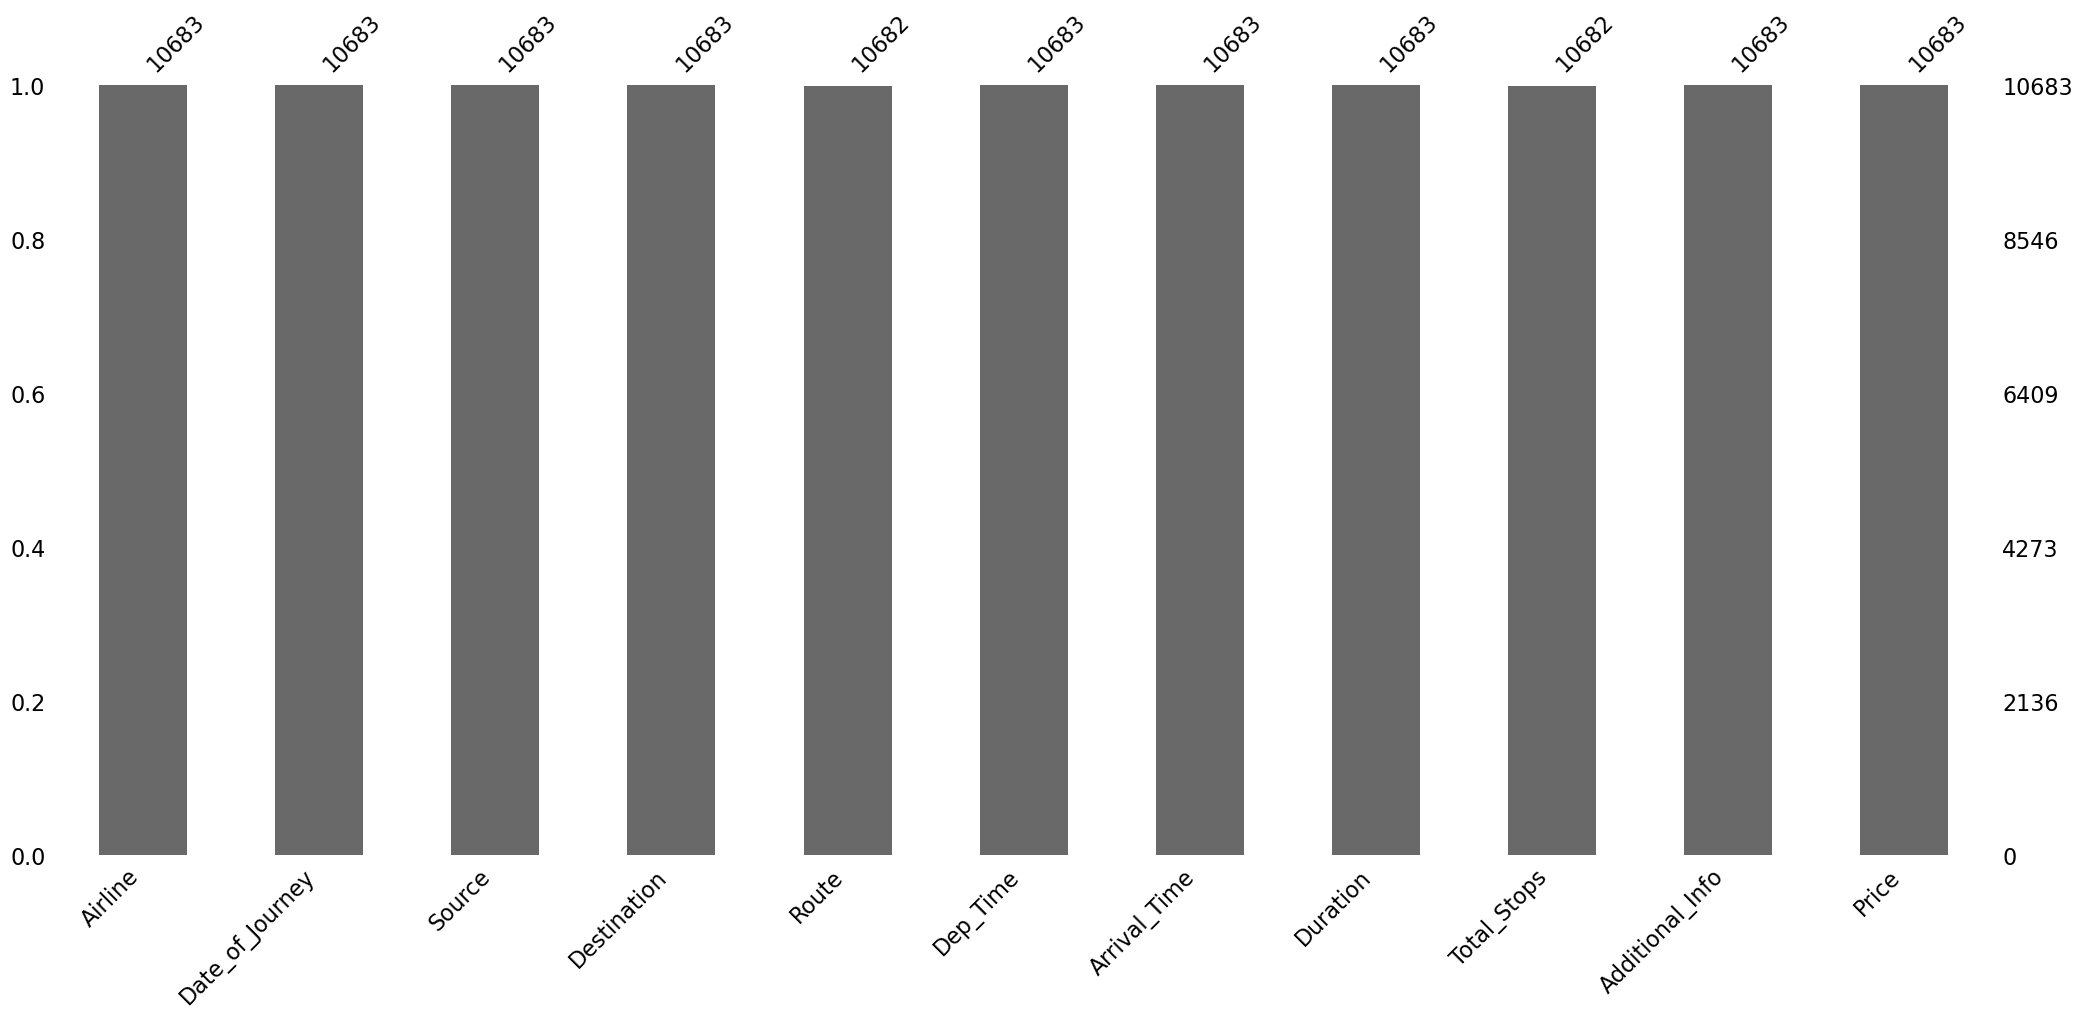

In [119]:
import missingno as msno
msno.bar(train_data)
plt.show

We find two missing values, which are so insignificant that I can just ignore them.

In [120]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [121]:
train_data.dropna(inplace=True)

In [122]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [123]:
data = train_data.copy()

In [124]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [125]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [126]:
##data preprocessing - creating derived features from the given columns

In [127]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [128]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [129]:
def change_into_Datetime(col):
  data[col] = pd.to_datetime(data[col])

In [130]:
DTCols = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']

In [131]:
for col in DTCols:
  change_into_Datetime(col)


In [132]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [133]:
data['travel_day'] = data['Date_of_Journey'].dt.day
data['travel_month'] = data['Date_of_Journey'].dt.month
data['travel_year'] = data['Date_of_Journey'].dt.year

data.drop('Date_of_Journey', inplace=True, axis = 1)

In [134]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,travel_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-10 05:50:00,2023-10-10 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-10 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-10-10 18:05:00,2023-10-10 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-10-10 16:50:00,2023-10-10 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [135]:
data.shape

(10682, 13)

In [136]:
def extract_hr_min(df, col):
  df[col+'_hour'] = df[col].dt.hour
  df[col+'_min'] = df[col].dt.minute
  return df.head(3)

In [137]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'travel_day',
       'travel_month', 'travel_year'],
      dtype='object')

In [138]:
extract_hr_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,travel_year,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-10 05:50:00,2023-10-10 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-10 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,4,25


In [139]:
extract_hr_min(data, 'Dep_Time')

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,travel_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-10 05:50:00,2023-10-10 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-10 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,4,25,9,25


In [140]:
data.drop(['Arrival_Time', 'Dep_Time'], inplace = True, axis=1)

In [141]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,travel_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50


In [142]:
def flight_dep_time(x):
  if(x>4) and (x<=8):
    return 'Early Morning'
  elif (x>8) and (x<=12):
    return 'Morning'
  elif (x>12) and (x<=16):
    return 'Noon'
  elif (x>16) and (x<=20):
    return 'Evening'
  elif (x>20) and (x<=24):
    return 'Night'
  else :
    return 'Late Night'

# Exploratory Data Analysis and Visualization

In [143]:
#2> Price variation analysis through out the day

# Assuming you have a DataFrame named 'data' with a column 'Dep_Time_hour'

# Calculate the value counts and create a DataFrame
value_counts_df = data['Dep_Time_hour'].apply(flight_dep_time).value_counts().reset_index()
value_counts_df.columns = ['Time', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(value_counts_df, x='Time', y='Count', title='Flight Departure Times')
fig.show()


In [144]:
def preprocess_duration(x):
  if 'h' not in x:
    x = '0h' + ' ' + x
  elif 'm' not in x:
    x = x + ' ' + '0m'

  return x

data['Duration'] = data['Duration'].apply(preprocess_duration)

In [145]:
data['duration_min'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['duration_hour'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [146]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,travel_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,duration_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50,4,45


In [147]:
#Lets analyse whether duration impacts on fare prices or not

#converting duration into total number of travel time in mins

In [148]:
 data['total_duration_min'] = data['Duration'].str.replace('h', "*60").str.replace(' ', '+').str.replace('m', "*1").apply(eval)

In [149]:
fig = px.scatter(data, x='total_duration_min', y='Price', color='Total_Stops')
fig.show()

In [150]:
#let's use regression plot and find the relationship

fig = px.scatter(data, x='total_duration_min', y='Price', trendline='ols')
fig.show()


In [151]:


#3> On which route Jet Airways is extremely used?

#let's extract jet airways data

In [152]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [153]:
  # 1> Airline vs Price Analysis`

data_sorted = data.sort_values('Price', ascending=False)

fig = px.box(data_sorted, x='Airline', y='Price')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better readability
fig.show()


The data clearly shows that Jet Airways Business Class has the highest prices. However, apart from the top Airline, the others have almost comparable median prices.

In [154]:
data_sorted= data_sorted.sort_values("Price", ascending=False)

fig = px.violin(data_sorted, y="Price", x="Source", 
                title="Price Distribution by Source (Violin Plot)",
                height=400, width=900)
fig.show()

In [155]:


data_sorted = data_sorted.sort_values("Price", ascending=False)

fig = px.box(data_sorted, y="Price", x="Destination", 
             title="Price Distribution by Destination (Box Plot)",
             height=400, width=900)
fig.show()


Here, we've found that New Delhi has the most outliers and Kolkata has the least by using a cat plot to draw the box plot between flight cost and passenger origin and destination.

In [156]:
#Feature Engieering

For nominal data (Order less categories) we are going to use One-Hot Encoding & for ordinal data we are going to use Label Encoding

In [157]:
#considering categorical values
cat_var = [col for col in data.columns if data[col].dtype == 'object']

In [158]:
cat_var

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [159]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

let's implement one-hot encoding algorithm without any library

In [160]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [161]:
for city in data['Source'].unique():
  data['source_' + city] = data['Source'].apply(lambda x : 1 if x == city else 0)

In [162]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,...,Dep_Time_hour,Dep_Time_min,duration_min,duration_hour,total_duration_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,22,20,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,9,25,19,0,1140,0,0,1,0,0


In [163]:
data.drop('Source', axis =1, inplace = True)

In [164]:
airline = data.groupby(['Airline'])['Price'].mean().sort_values(ascending = True).index

In [165]:
dict_airline = {key:index for index, key in enumerate(airline, 0)}


In [166]:
data['Airline'] = data['Airline'].map(dict_airline)


In [167]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [168]:
dict_airline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [169]:
#In Destination col both Delhi and New Delhi were same so let's replace one of the term with other
data['Destination']= data['Destination'].replace("New Delhi", "Delhi")

In [170]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [171]:
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [172]:
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [173]:
dict_dest = {key:index for index, key in enumerate(destination, 0)}

In [174]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [175]:
data['Destination'] = data['Destination'].map(dict_dest)

In [176]:
data.head(3)

,Airline,Destination,Route,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,travel_year,...,Dep_Time_hour,Dep_Time_min,duration_min,duration_hour,total_duration_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,...,22,20,2,50,170,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,...,5,50,7,25,445,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,...,9,25,19,0,1140,0,0,1,0,0


In [177]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [178]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [179]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [180]:
data.head()

,Airline,Destination,Route,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,travel_year,...,Dep_Time_hour,Dep_Time_min,duration_min,duration_hour,total_duration_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,...,22,20,2,50,170,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,2019,...,5,50,7,25,445,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,9,2019,...,9,25,19,0,1140,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,2019,...,18,5,5,25,325,0,1,0,0,0
4,3,2,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,2019,...,16,50,4,45,285,1,0,0,0,0


In [181]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'travel_day', 'travel_month', 'travel_year',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'duration_min', 'duration_hour', 'total_duration_min',
       'source_Banglore', 'source_Kolkata', 'source_Delhi', 'source_Chennai',
       'source_Mumbai'],
      dtype='object')

In [182]:
#Removal of Unecessary Features --
data.drop(columns = ['Additional_Info', 'total_duration_min', 'Route', 'Duration'], axis =1, inplace=True)

In [183]:
data.head()

,Airline,Destination,Total_Stops,Price,travel_day,travel_month,travel_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,duration_min,duration_hour,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2,0,3897,24,3,2019,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,2019,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,2019,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,2019,23,30,18,5,5,25,0,1,0,0,0
4,3,2,1,13302,3,1,2019,21,35,16,50,4,45,1,0,0,0,0


In [184]:
#Outlier detection - Always better practise to plot boxplot, histogram and distribution plot to know in detail about the outliers

In [185]:
def plot(df, col):
  fig, (ax1, ax2, ax3) = plt.subplots(3,1)


  sns.distplot(df[col], ax = ax1)
  sns.boxplot(df[col], ax = ax2, orient = 'h')
  sns.distplot(df[col], ax = ax3, kde=False)

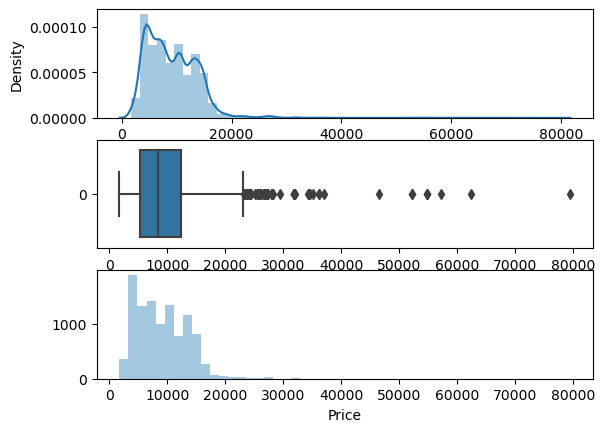

In [186]:
plot(data, 'Price')

In [187]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [188]:
#finding IQR - Inter Quantile Range

q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1
max_price = q3 + 1.5*iqr
min_price = q1 - 1.5*iqr

In [189]:
max_price

23017.0

In [190]:
min_price

-5367.0

In [191]:
#number of OUTLIERS
len([price for price in data['Price'] if price > max_price or price < min_price])

94

In [192]:
#In the document it is given that the max usual price of the flight fare is 35000/-,
#considering that let's replace prices which are greater than 35000 with median of the values

data['Price']=np.where(data['Price'] >=35000, data['Price'].median(), data['Price'])

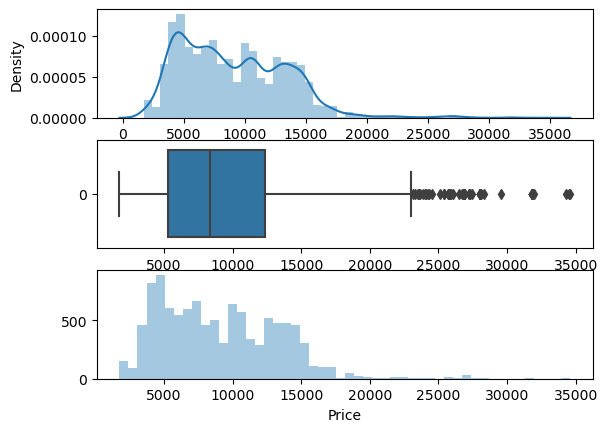

In [193]:
plot(data, 'Price')
#hence Skewness reduced

In [194]:
y= data['Price']


In [195]:
X=data.drop(['Price'], axis=1)

In [196]:
from sklearn.feature_selection import mutual_info_regression

In [197]:
imp = mutual_info_regression(X,y)

In [198]:
imp_df = pd.DataFrame(imp, index = X.columns)

In [199]:
imp_df.columns = ['importance']

In [200]:
imp_df.sort_values(by='importance',ascending = False)

,importance
Destination,0.997450
Airline,0.983857
Total_Stops,0.794590
source_Delhi,0.517251
duration_min,0.469069
source_Kolkata,0.455972
Arrival_Time_hour,0.405200
source_Banglore,0.388514
Arrival_Time_min,0.347508
duration_hour,0.341852


Based on the factors with the strongest positive correlation to the dependent variable (Price) are travel destination (1.000836) and airline (0.971937). It seems that the price of a plane ticket is significantly affected by both the location and the airline of choice.

In [201]:
data.corr()['Price']

Airline              0.612236
Destination          0.386265
Total_Stops          0.633635
Price                1.000000
travel_day          -0.165545
travel_month         0.025825
travel_year               NaN
Arrival_Time_hour    0.030389
Arrival_Time_min    -0.090662
Dep_Time_hour        0.006235
Dep_Time_min        -0.033104
duration_min         0.544661
duration_hour       -0.126571
source_Banglore     -0.142335
source_Kolkata       0.017079
source_Delhi         0.291908
source_Chennai      -0.187463
source_Mumbai       -0.241168
Name: Price, dtype: float64

In [202]:
#Seasonal Pricing Analysis

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [203]:
data['travel_month_string'] = [month_mapping[month] for month in data['travel_month']]

In [204]:
data['travel_month_string'].value_counts()


June         2535
March        2211
May          2074
September    1406
January      1075
December      957
April         424
Name: travel_month_string, dtype: int64

In [205]:
##Seasonal Month Analysis
mean_price_by_month = data.groupby('travel_month_string')['Price'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(mean_price_by_month, x='travel_month_string', y='Price',
             title='Mean Price by Travel Month',
             labels={'travel_month_string': 'Travel Month', 'Price': 'Mean Price'})
fig.show()


# Data Modeling